## Image classification CNN


In [36]:
import numpy as np
import os
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import BinaryCrossentropy
import sklearn
import matplotlib.pyplot as plt
import sklearn.metrics as skm

In [37]:
# load data
os.chdir('E:\Babette\MasterThesis\Data')
train_data = np.load('train_data.npy') 
val_data = np.load('val_data.npy') 

shape = np.load('shape.npy')
IMG_HEIGHT= shape[0]
IMG_WIDTH= shape[1]

In [38]:

# X-Features & Y-Labels 
  
x_train = np.array([i[0] for i in train_data]).reshape(-1, IMG_HEIGHT,IMG_WIDTH, 1) 
y_train = np.array([i[1] for i in train_data])
y_train = np.array([i[0] for i in y_train])
x_val = np.array([i[0] for i in val_data]).reshape(-1,   IMG_HEIGHT, IMG_WIDTH, 1) 
y_val = np.array([i[1] for i in val_data] )
y_val = np.array([i[0] for i in y_val] )

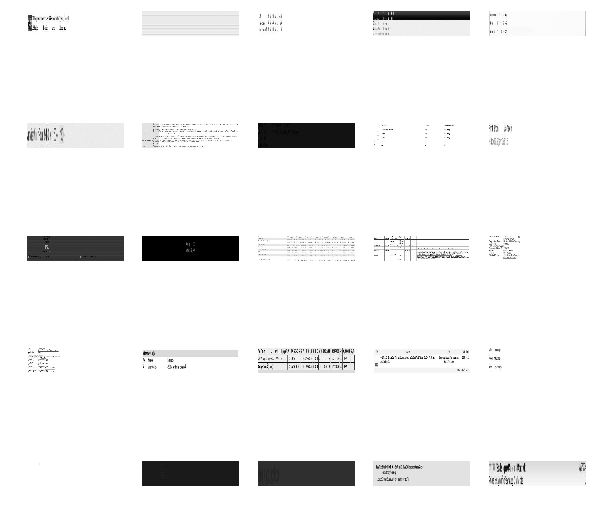

In [39]:

plt.figure(figsize=(10,10))
    
for n in range(25):
  ax = plt.subplot(5,5,n+1)
  plt.imshow(train_data[n][0],cmap='gray', vmin = 0, vmax = 255)
  #plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
  plt.axis('off')

In [40]:
print('Shape of data tensor:', x_train.shape)
print('Shape of label tensor:', y_train.shape)

print('Shape of data tensor:', x_val.shape)
print('Shape of label tensor:', y_val.shape)

Shape of data tensor: (3160, 90, 343, 1)
Shape of label tensor: (3160,)
Shape of data tensor: (660, 90, 343, 1)
Shape of label tensor: (660,)


In [50]:
def define_model(#filter,
                 #kernel_size,
                 #dropout_rate,
                 #pool_size
                ):


    model = Sequential()
    
    #model.add(Input(shape=(IMG_WIDTH, AVG_WIDTH,1)))
    
    #convolutional layers
    #1
    model.add(Conv2D(filters=32,
                     kernel_size=3,
                     activation='relu',
                     input_shape= (IMG_HEIGHT,IMG_WIDTH,1),
                     #bias_initializer='random_uniform',
                     #kernel_initializer='random_uniform',
                     padding='valid'))
    
    model.add(MaxPooling2D())
    #model.add(Dropout(rate=0.2))
    
    #2
    model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu',
                     #input_shape= (IMG_WIDTH, IMG_HEIGHT),
                     #bias_initializer='random_uniform',
                     #kernel_initializer='random_uniform',
                    padding='valid'))
    
    model.add(MaxPooling2D())
    
    #3
    model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu',
                     #input_shape= (IMG_WIDTH, IMG_HEIGHT),
                     #bias_initializer='random_uniform',
                     #kernel_initializer='random_uniform',
                     padding='valid'))
    
    #model.add(MaxPooling2D())    
   
    #dropout Layer
    model.add(Dropout(rate=0.2))
    
    model.add(Flatten())
    #dense layer
    model.add(Dense(512, 'relu'))

    #dense, final prediction layer, binary problem (units dimensionality of output space=1)
    model.add(Dense(1, 'sigmoid')) 
    return model


In [51]:
#Initiate Model
model= define_model()
#model.summary()

In [52]:
#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
#Parameter
epochs=150
callbacks= [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)]
batch_size=32

In [54]:
history = model.fit(
        x_train,
        y_train,
        epochs=epochs,
        #callbacks=callbacks,
        validation_data=(x_val, y_val),
        #validation_split=0.2,
        #verbose=1,  # Logs once per epoch.
        batch_size=batch_size)

Train on 3160 samples, validate on 660 samples
Epoch 1/150
3160/3160 [==============================] - 135s 43ms/sample - loss: 483.5099 - acc: 0.6794 - val_loss: 23.8530 - val_acc: 0.6591
Epoch 2/150
3160/3160 [==============================] - 141s 45ms/sample - loss: 3.1241 - acc: 0.8984 - val_loss: 28.6766 - val_acc: 0.6879
Epoch 3/150
3160/3160 [==============================] - 142s 45ms/sample - loss: 3.3960 - acc: 0.9158 - val_loss: 29.2112 - val_acc: 0.6121
Epoch 4/150
3160/3160 [==============================] - 141s 45ms/sample - loss: 3.2207 - acc: 0.9354 - val_loss: 45.6637 - val_acc: 0.6848
Epoch 5/150
3160/3160 [==============================] - 140s 44ms/sample - loss: 1.3353 - acc: 0.9636 - val_loss: 48.3929 - val_acc: 0.6788
Epoch 6/150
3160/3160 [==============================] - 141s 45ms/sample - loss: 0.9007 - acc: 0.9744 - val_loss: 65.2864 - val_acc: 0.6697
Epoch 7/150
3160/3160 [==============================] - 140s 44ms/sample - loss: 0.5980 - acc: 0.9839 - 

3160/3160 [==============================] - 139s 44ms/sample - loss: 0.0133 - acc: 0.9978 - val_loss: 47.6693 - val_acc: 0.6955
Epoch 59/150
3160/3160 [==============================] - 139s 44ms/sample - loss: 0.6848 - acc: 0.9734 - val_loss: 18.8522 - val_acc: 0.6742
Epoch 60/150
3160/3160 [==============================] - 140s 44ms/sample - loss: 0.1531 - acc: 0.9823 - val_loss: 16.4690 - val_acc: 0.6742
Epoch 61/150
3160/3160 [==============================] - 139s 44ms/sample - loss: 0.0580 - acc: 0.9854 - val_loss: 16.5207 - val_acc: 0.6788
Epoch 62/150
3160/3160 [==============================] - 139s 44ms/sample - loss: 0.0207 - acc: 0.9877 - val_loss: 17.3230 - val_acc: 0.6712
Epoch 63/150
3160/3160 [==============================] - 139s 44ms/sample - loss: 0.0169 - acc: 0.9883 - val_loss: 17.9464 - val_acc: 0.6712
Epoch 64/150
3160/3160 [==============================] - 139s 44ms/sample - loss: 0.0160 - acc: 0.9886 - val_loss: 18.1380 - val_acc: 0.6773
Epoch 65/150
3160/3

3160/3160 [==============================] - 170s 54ms/sample - loss: 0.0170 - acc: 0.9918 - val_loss: 16.2149 - val_acc: 0.6955
Epoch 116/150
3160/3160 [==============================] - 181s 57ms/sample - loss: 0.0150 - acc: 0.9921 - val_loss: 17.0067 - val_acc: 0.6955
Epoch 117/150
3160/3160 [==============================] - 172s 54ms/sample - loss: 0.0146 - acc: 0.9921 - val_loss: 18.0540 - val_acc: 0.6894
Epoch 118/150
3160/3160 [==============================] - 175s 55ms/sample - loss: 0.0143 - acc: 0.9921 - val_loss: 19.6346 - val_acc: 0.6833
Epoch 119/150
3160/3160 [==============================] - 181s 57ms/sample - loss: 0.0141 - acc: 0.9921 - val_loss: 20.3907 - val_acc: 0.6833
Epoch 120/150
3160/3160 [==============================] - 157s 50ms/sample - loss: 0.0140 - acc: 0.9921 - val_loss: 20.6948 - val_acc: 0.6833
Epoch 121/150
3160/3160 [==============================] - 205s 65ms/sample - loss: 0.0138 - acc: 0.9921 - val_loss: 22.2316 - val_acc: 0.6818
Epoch 122/150

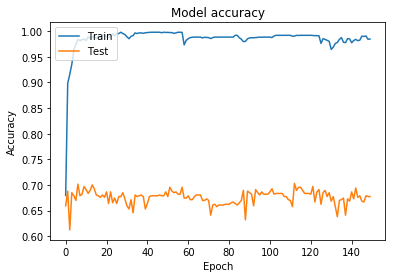

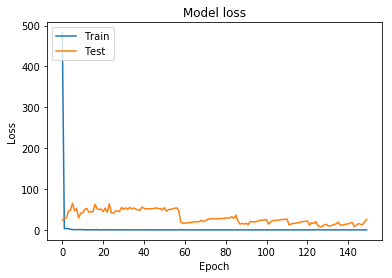

In [55]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [56]:
#load test data
os.chdir('E:\Babette\MasterThesis\Data')
test_data = np.load('E:\Babette\MasterThesis\Data\\test_data.npy') 

x_test = np.array([i[0] for i in test_data]).reshape(-1, IMG_HEIGHT,IMG_WIDTH, 1) 
y_test = np.array([i[1] for i in test_data])
y_test = np.array([i[0] for i in y_test])

print('Shape of data tensor:', x_test.shape)
print('Shape of label tensor:', y_test.shape)


Shape of data tensor: (589, 90, 343, 1)
Shape of label tensor: (589,)


In [57]:
#Predictions on test set

y_pred = np.around(model.predict(x_test)).astype(int)


In [58]:
report = skm.classification_report(y_test, y_pred, )
print(report) 


              precision    recall  f1-score   support

           0       0.57      0.29      0.39        79
           1       0.90      0.97      0.93       510

   micro avg       0.88      0.88      0.88       589
   macro avg       0.74      0.63      0.66       589
weighted avg       0.85      0.88      0.86       589



In [59]:
#confusion Matrix
cm = skm.confusion_matrix(y_test, y_pred)
print(cm)


[[ 23  56]
 [ 17 493]]


In [60]:
print('F1 score: ')
print(skm.f1_score(y_test, y_pred, pos_label=1))
print('Precision: ')
print(sklearn.metrics.precision_score(y_test, y_pred, pos_label=1))
print('Recall:')
print(sklearn.metrics.recall_score(y_test, y_pred, pos_label=1))



print('F1 score: ')
print(skm.f1_score(y_test, y_pred, pos_label=0))
print('Precision: ')
print(sklearn.metrics.precision_score(y_test, y_pred, pos_label=0))
print('Recall:')
print(sklearn.metrics.recall_score(y_test, y_pred, pos_label=0))


F1 score: 
0.931067044381492
Precision: 
0.8979963570127505
Recall:
0.9666666666666667
F1 score: 
0.38655462184873945
Precision: 
0.575
Recall:
0.2911392405063291


In [61]:
# Save model.
#model.save('E:\Babette\MasterThesis\Models\Binary_CNN_model_1.h5') 
#5 conv layers
#F1 score: 
#0.8074807480748074
#Precision: 
#0.9197994987468672
#Recall:
#0.7196078431372549

#model.save('E:\Babette\MasterThesis\Models\Binary_CNN_model_2.h5')
#3 conv layers
#2 dense
#F1 score: 
#0.9097674418604652
#Precision: 
#0.8654867256637168
#Recall:
#0.9588235294117647


#model.save('E:\Babette\MasterThesis\Models\Binary_CNN_model_3.h5')
#1 conv layer
#1dense
#F1 score: 
#0.9380203515263644
#Precision: 
#0.8879159369527145
#Recall:
#0.9941176470588236
#F1 score: 
#0.30927835051546393
#Precision: 
#0.8333333333333334
#Recall:
#0.189873417721519

model.save('E:\Babette\MasterThesis\Models\Binary_CNN_model_4.h5')
#1 conv
#2 dense
#dropout
#F1 0.93
#f1 0.39


In [ ]:
# load model trained before
#model.load_weights('E:\Babette\MasterThesis\Models\Binary_CNN_model_3.h5')